In [2]:
import geopandas

In [53]:
import pandas

In [5]:
import matplotlib.pyplot as plt

In [65]:
import seaborn as sns

In [3]:
dltb16 = geopandas.read_file("./data/dltb/DLTB2016.shp")
dltb17 = geopandas.read_file("./data/dltb/DLTB2017.shp")

<AxesSubplot:>

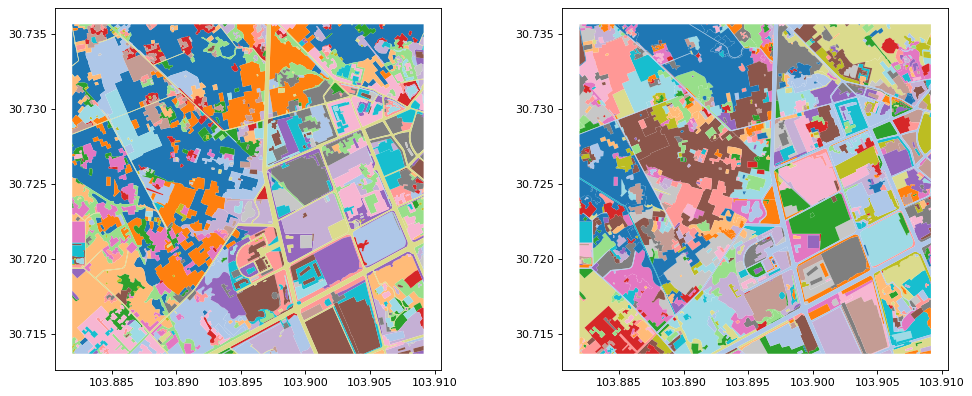

In [33]:
plt.figure(figsize=(15,6), dpi=80)
plt.figure(1)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
dltb16.plot(ax=ax1,cmap="tab20")
dltb17.plot(ax=ax2,cmap="tab20_r")

In [34]:
udf = geopandas.overlay(dltb16,dltb17,how="union")

In [39]:
udf2 = udf.copy()

In [47]:
def ischange(cc1,cc2):
    if cc1 == cc2:
        return "green"
    else:
        return "red"

In [48]:
udf2["c"] = udf.apply(lambda u : ischange(u["CC_1"],u["CC_2"]),axis=1)

In [60]:
udf2["area"] = udf.apply(lambda u : u["geometry"].area,axis=1)

<AxesSubplot:>

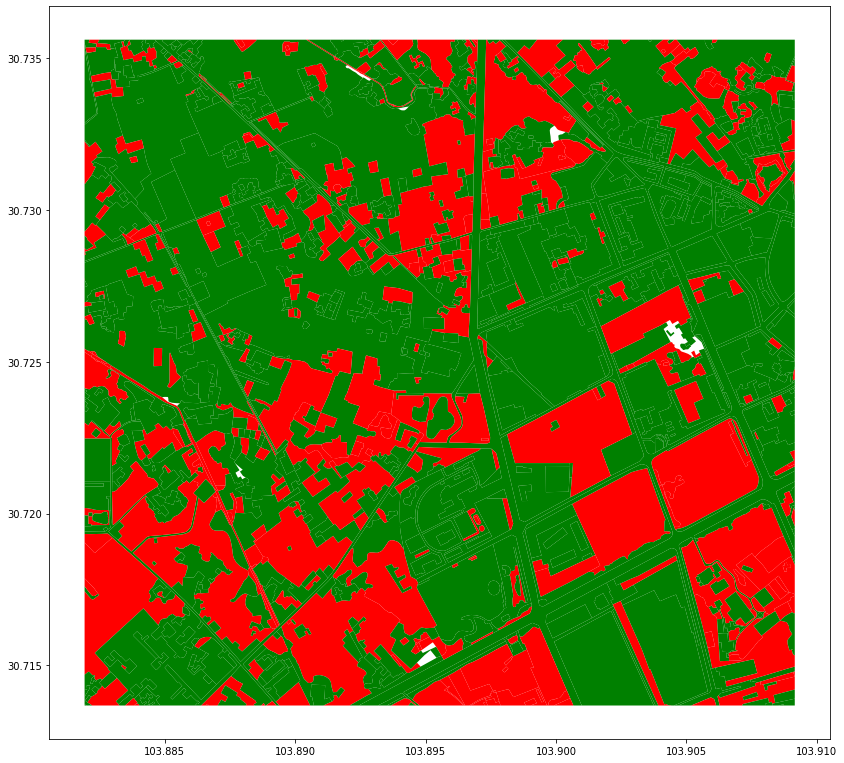

In [51]:
fig, ax = plt.subplots(figsize=(14,14))
udf2.plot(ax=ax,color=udf2["c"])

In [63]:
pt = pandas.pivot_table(data=udf2,index="CC_1",columns="CC_2",
                        aggfunc=sum,values="area")

In [68]:
pt.head()

CC_2          0110          0120          0170          0180          0311  \
CC_1                                                                         
0110  1.071906e-04  2.931229e-16  1.888096e-13           NaN  2.666247e-08   
0120  2.726992e-16  2.526017e-05  3.618548e-07           NaN  1.207570e-16   
0250  1.183626e-06  1.147822e-07  1.020839e-04  9.627038e-08  2.251603e-13   
0260           NaN           NaN  1.217880e-17  1.493760e-06  8.415970e-18   
0311  7.570450e-07  4.370927e-07  5.092796e-07  7.453042e-18  3.986246e-05   

CC_2          0321          0340          0360          0391          03A2  \
CC_1                                                                         
0110  5.445171e-18  2.067468e-16  5.305679e-17  3.125893e-07           NaN   
0120  1.807887e-17  2.858137e-17  1.097035e-16  8.961987e-07           NaN   
0250  6.072600e-19  5.880155e-16  1.144880e-16  1.397086e-07  2.364592e-18   
0260  4.090241e-18           NaN           NaN  1.793775e-17           NaN   
0311           NaN  5.756460e-15  6.922106e-17  2.285003e-06  4.205647e-17   

CC_2  ...          0713          0717  0718          0719          0750  0790  \
CC_1  ...                                                                       
0110  ...           NaN  1.116389e-18   NaN  5.388720e-18  6.829488e-07   NaN   
0120  ...  2.996107e-18           NaN   NaN  3.088238e-18  6.618718e-17   NaN   
0250  ...           NaN           NaN   NaN  5.193779e-17  2.400426e-07   NaN   
0260  ...           NaN           NaN   NaN           NaN  4.589671e-17   NaN   
0311  ...           NaN  1.806283e-17   NaN  4.723056e-17  4.607412e-17   NaN   

CC_2      0832          0839          1001          1012  
CC_1                                                      
0110       NaN           NaN  9.332822e-08  3.940276e-17  
0120  0.000008  1.262942e-13  2.311574e-17  3.206261e-17  
0250       NaN  1.510837e-07  6.366379e-08  3.045146e-17  
0260       NaN           NaN           NaN           NaN  
0311       NaN           NaN  8.748096e-07  4.769892e-18  

[5 rows x 29 columns]

<AxesSubplot:xlabel='CC_2', ylabel='CC_1'>

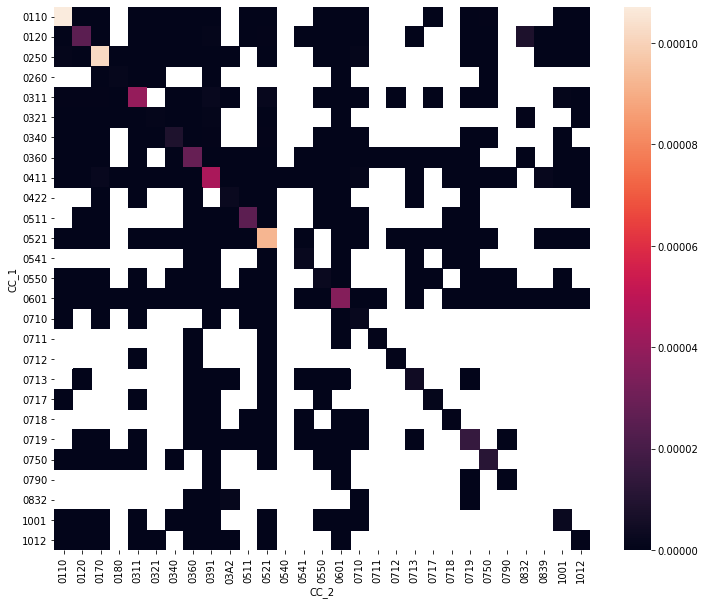

In [69]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(pt)